In [82]:
#Part 01
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [83]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [84]:
crosstab  = pd.crosstab(df["category"], df["isBestSeller"])
crosstab 

isBestSeller,False,True
category,,
3D Printers,247,1
3D Printing & Scanning,4065,2
Abrasive & Finishing Products,245,5
Action Cameras,1696,1
Adapters,251,3
...,...,...
Wind Instruments,243,7
Window Treatments,234,5
Women,17559,213


In [85]:
proportion_category_bestseller = df.groupby("category")["isBestSeller"].mean().sort_values(ascending=False)
proportion_category_bestseller

category
Grocery                             0.058135
Smart Home Security & Lighting      0.057692
Health & Personal Care              0.057686
Mobile Phone Accessories            0.042471
Power & Hand Tools                  0.035339
                                      ...   
CD, Disc & Tape Players             0.000000
General Music-Making Accessories    0.000000
Snowboard Boots                     0.000000
Boxes & Organisers                  0.000000
eBook Readers & Accessories         0.000000
Name: isBestSeller, Length: 296, dtype: float64

In [86]:
from scipy.stats import chi2_contingency

chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab)

chi2_statistic, chi2_p_value

(36540.20270061387, 0.0)

In [87]:
from scipy.stats.contingency import association

association(crosstab, method="cramer")

0.1222829439760564

<Axes: xlabel='category'>

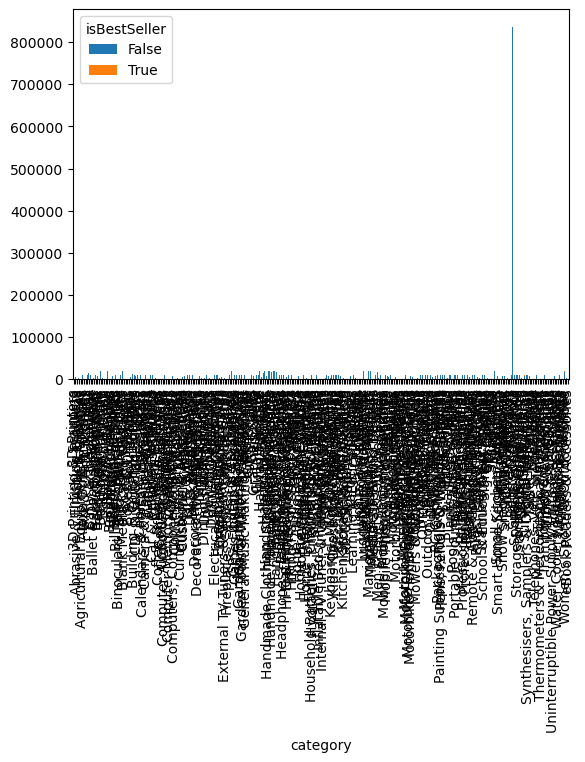

In [88]:
crosstab.plot(kind="bar", stacked=True)

In [89]:
##Part 02.
def identify_outliers(df):
     Q1 = df.quantile(0.25)
     Q3 = df.quantile(0.75)
     IQR = Q3 - Q1

     lower_bound = Q1 - 1.5 * IQR
     upper_bound = Q3 + 1.5 * IQR

     outliers = df[(df < lower_bound) | (df > upper_bound)]

     return outliers


In [90]:
data_outliers = df["price"]
outliers = identify_outliers(data_outliers)
print(outliers)

10         139.00
19         164.99
25         149.99
28         289.00
31         199.99
            ...  
2443619    166.99
2443627    152.58
2443638    108.77
2443641    166.99
2443643    158.99
Name: price, Length: 327688, dtype: float64


In [91]:
df1 = df.drop(outliers.index)

In [92]:
top_20_df = df1["category"].value_counts().nlargest(20).index.tolist()
top_20_df

['Sports & Outdoors',
 'Beauty',
 'Bath & Body',
 'Manicure & Pedicure Products',
 'Handmade Clothing, Shoes & Accessories',
 'Make-up',
 'Skin Care',
 'Hair Care',
 'Birthday Gifts',
 'Handmade Gifts',
 'Handmade Home Décor',
 'Luggage and travel gear',
 'Women',
 'Fragrances',
 'Handmade Kitchen & Dining',
 'Handmade Artwork',
 'Handmade Home & Kitchen Products',
 'Handmade Jewellery',
 'Men',
 'Baby']

In [93]:
df_20_top = df1[df1["category"].isin(top_20_df)]

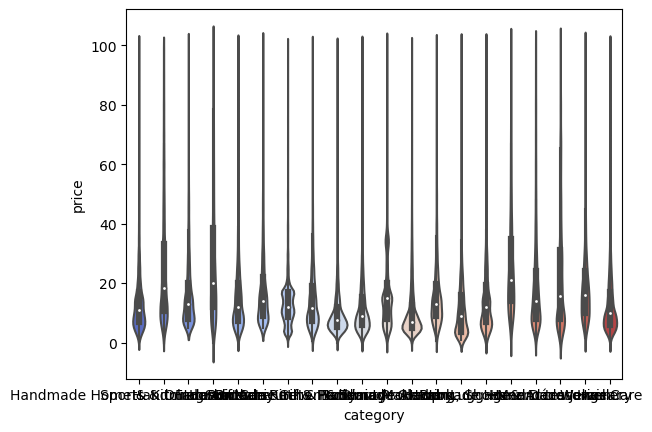

In [94]:
sns.violinplot(data=df_20_top, x="category", y="price", palette="coolwarm")
plt.title = ("Price by 20 top categories")
plt.show()

In [95]:
df_median = df1.groupby("category")["price"].median().head(1)
df_median

category
3D Printers    52.195
Name: price, dtype: float64

In [96]:
top_10_df = df1["category"].value_counts().nlargest(10).index.tolist()

In [97]:
df_top_10 = df1[df1["category"].isin(top_10_df)]

In [98]:
df10 = df_top_10.groupby("category")["price"].mean()

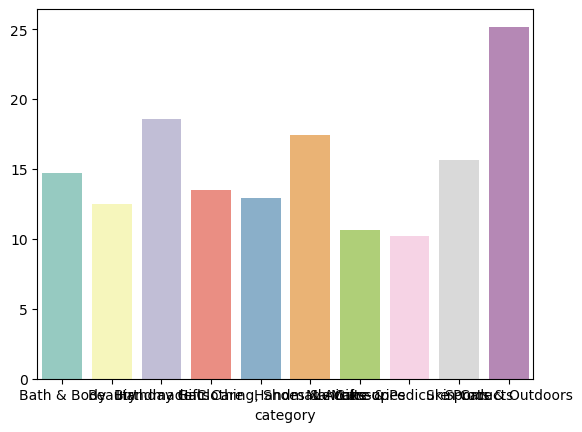

In [99]:
sns.barplot(x=df10.index, y=df10.values, palette="Set3");

In [100]:
df_average = df1.groupby("category")["price"].mean().head(1)
df_average

category
3D Printers    55.739722
Name: price, dtype: float64

<Axes: xlabel='category', ylabel='stars'>

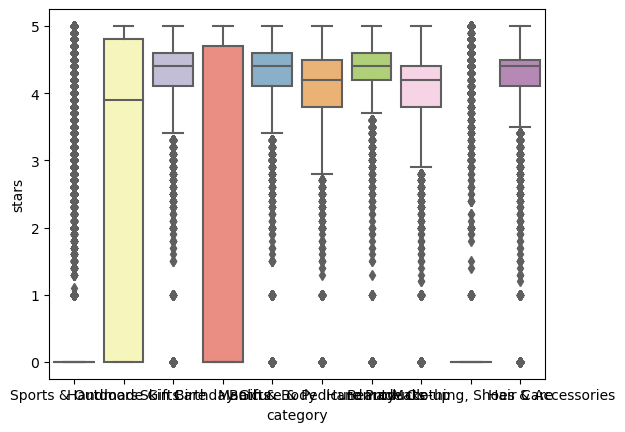

In [102]:
sns.boxplot(data= df_top_10, x='category', y='stars', palette='Set3')

In [109]:
median_rat = df.groupby("category")["stars"].median().head(1)
median_rat

category
3D Printers    3.9
Name: stars, dtype: float64

In [110]:
correlation = df['stars'].corr(df['price'])
correlation

-0.12490673262148641

In [111]:
correlation = df['stars'].corr(df['price'], method='spearman')
correlation

-0.13316425462433912

In [ ]:
##Yes, there is a correlation

<Axes: xlabel='stars', ylabel='price'>

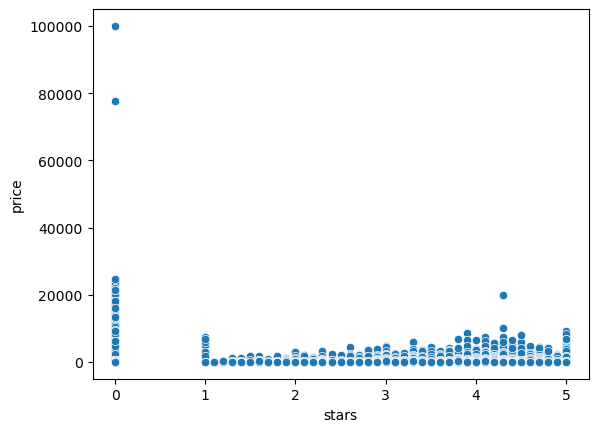

In [112]:
sns.scatterplot(data=df, x='stars', y='price')

In [113]:
df_numerical = df1.select_dtypes(include=["int","float"])

TypeError: 'str' object is not callable

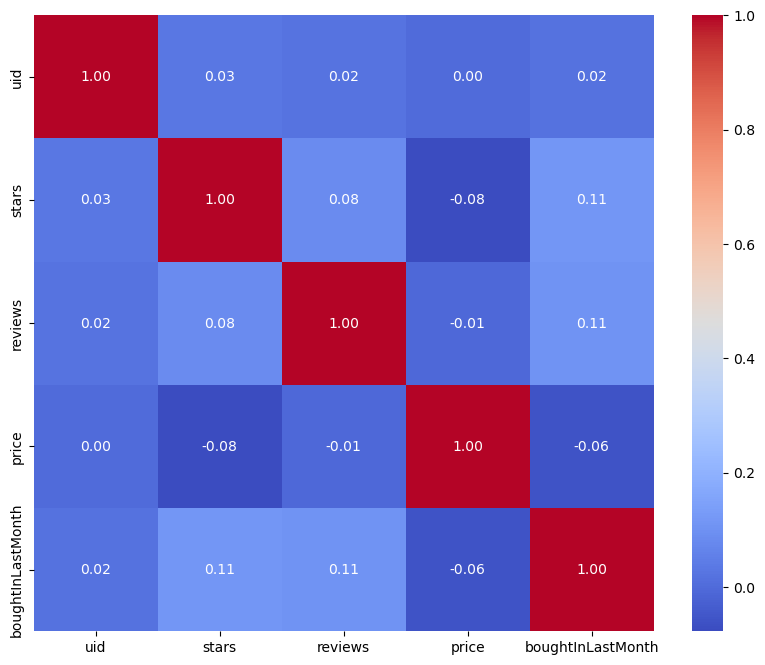

In [115]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_numerical.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

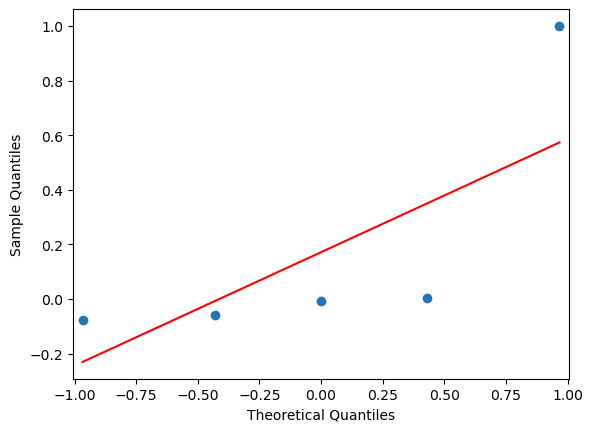

In [117]:
import statsmodels.api as sm

sm.qqplot(df1['price'], line='s');